<a href="https://colab.research.google.com/github/EdioHub/-Traffic-Sign-Classification-with-Convolutional-Neural-Networks-CNN---LeNet-/blob/main/classifica%C3%A7%C3%A3o_sinais_transito_deeplearning_Lenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Arquitetura LeNet: http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf

# Etapa 1-Importação das bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import PIL
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import pickle
import zipfile

# Etapa 2-importação de dados

In [84]:
from google.colab import drive
drive. mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
path = ('/content/drive/MyDrive/curso tensorflow udemy/8-Sinais_transito_convolucional/traffic-signs-data/traffic-signs-data.zip')

In [90]:
zip_object = zipfile.ZipFile(file = path, mode = 'r')
zip_object.extractall('./')
zip_object.close()


esses arquivos estão com uma extensão p precisa usar o pickle para leitura


In [91]:
with open('/content/traffic-signs-data/train.p', mode = 'rb') as training_data:
  train = pickle .load(training_data)
with open('/content/traffic-signs-data/test.p', mode = 'rb') as testing_data:
  test = pickle.load(testing_data)
with open('/content/traffic-signs-data/valid.p', mode = 'rb') as validation_data:
  valid = pickle.load(validation_data)

os arquivos já estão em matriz com o features e labels

In [9]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
  

separar o em um arquivo de treino e um de labels

In [10]:
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
X_validation, y_validation= valid['features'], valid['labels']

In [11]:
X_train.shape

(34799, 32, 32, 3)

In [12]:
X_test.shape

(12630, 32, 32, 3)

In [13]:
X_validation.shape

(4410, 32, 32, 3)

# Etapa 3-visualização dos dados

1

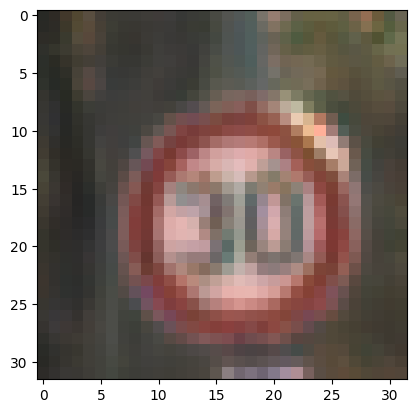

In [14]:
i = 3100
plt.imshow(X_train[i])
y_train[i]

36

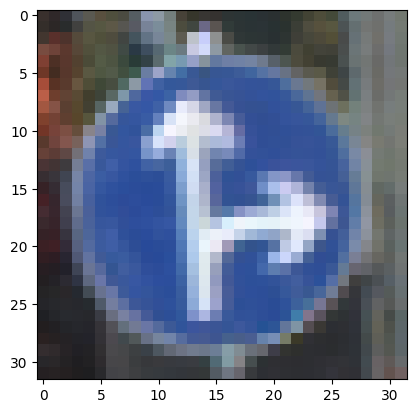

In [15]:
i = 3001
plt.imshow(X_test[i])
y_test[i]

8

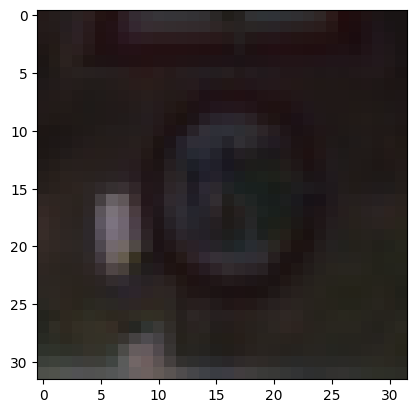

In [16]:
i = 2100
plt.imshow(X_validation[i])
y_validation[i]

# Etapa 4- Preparação dos dados

In [17]:
from sklearn.utils import shuffle

In [18]:
X_train, y_train = shuffle(X_train, y_train)

In [19]:
X_train_gray = np.sum(X_train / 3, axis = 3, keepdims = True)#keepdime deixar as dimensoes organizadas
X_test_gray = np.sum(X_test / 3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation / 3, axis = 3, keepdims = True)

In [20]:
X_train_gray.shape

(34799, 32, 32, 1)

In [21]:
X_test_gray.shape

(12630, 32, 32, 1)

In [22]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [23]:
X_train_gray


array([[[[ 86.66666667],
         [ 91.66666667],
         [ 85.        ],
         ...,
         [ 33.        ],
         [ 33.        ],
         [ 34.        ]],

        [[147.        ],
         [189.33333333],
         [200.66666667],
         ...,
         [ 32.33333333],
         [ 28.33333333],
         [ 28.        ]],

        [[118.33333333],
         [190.        ],
         [225.66666667],
         ...,
         [ 26.66666667],
         [ 22.        ],
         [ 23.        ]],

        ...,

        [[255.        ],
         [255.        ],
         [255.        ],
         ...,
         [154.33333333],
         [149.        ],
         [143.33333333]],

        [[255.        ],
         [255.        ],
         [255.        ],
         ...,
         [159.66666667],
         [147.33333333],
         [117.        ]],

        [[255.        ],
         [255.        ],
         [255.        ],
         ...,
         [194.33333333],
         [178.66666667],
         [171.   

In [24]:
X_train_gray_norm = (X_train_gray - 128) / 128
X_test_gray_norm = (X_test_gray-128) / 128
X_validation_gray_norm = (X_validation_gray - 128 ) / 128

In [25]:
X_train_gray_norm.shape


(34799, 32, 32, 1)

In [26]:
np.max(X_train_gray_norm )

0.9921875

In [27]:
np.min(X_train_gray_norm )

-0.9713541666666666

In [28]:
X_train.shape

(34799, 32, 32, 3)

<Figure size 640x480 with 0 Axes>

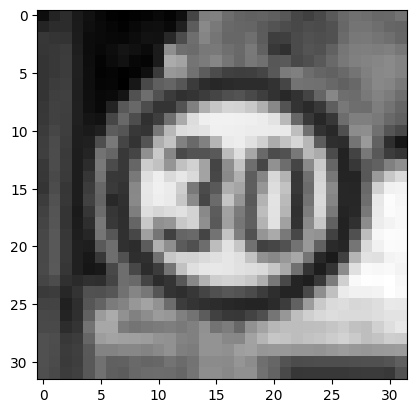

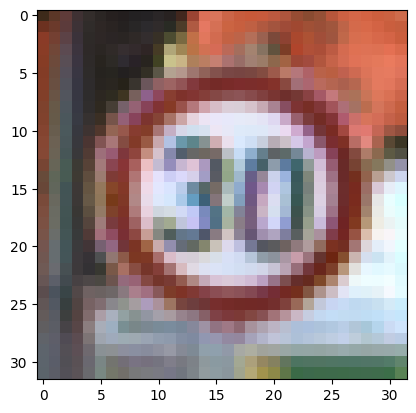

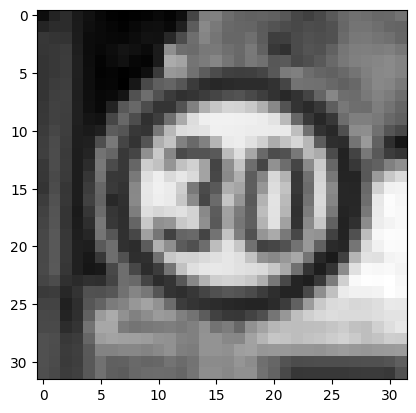

<Figure size 640x480 with 0 Axes>

In [29]:
i = 60
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')#similar ao reshape para ficar em 32/32
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')
plt.figure()

<Figure size 640x480 with 0 Axes>

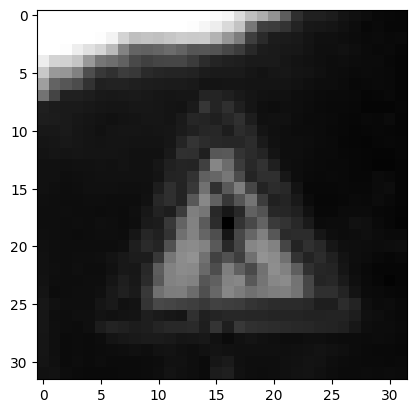

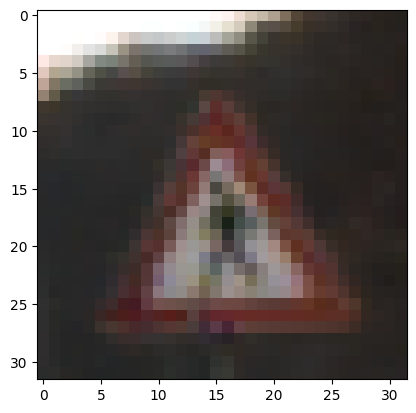

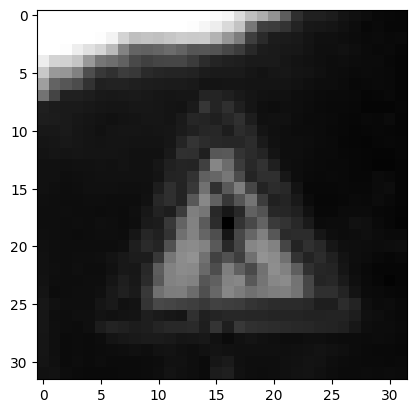

<Figure size 640x480 with 0 Axes>

In [30]:
i = 610
plt.imshow(X_test_gray[i].squeeze(), cmap = 'gray')#similar ao reshape para ficar em 32/32
plt.figure()
plt.imshow(X_test[i])
plt.figure()
plt.imshow(X_test_gray_norm[i].squeeze(), cmap = 'gray')
plt.figure()

<Figure size 640x480 with 0 Axes>

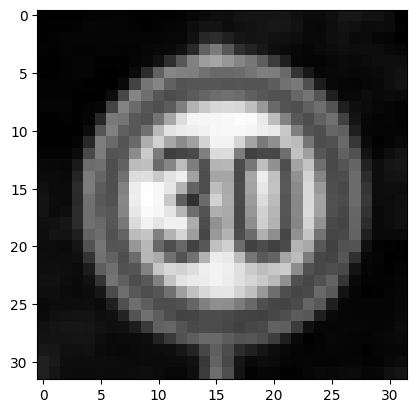

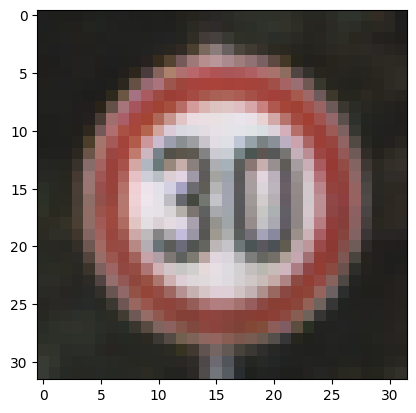

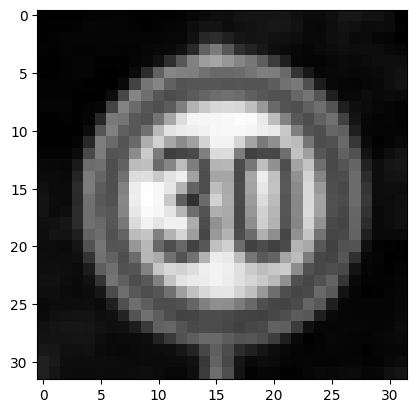

<Figure size 640x480 with 0 Axes>

In [31]:
i = 500
plt.imshow(X_validation_gray[i].squeeze(), cmap = 'gray')#similar ao reshape para ficar em 32/32
plt.figure()
plt.imshow(X_validation[i])
plt.figure()
plt.imshow(X_validation_gray_norm[i].squeeze(), cmap = 'gray')
plt.figure()

# Etapa5- criação do modelo e treinamento

Arquitetura LeNet

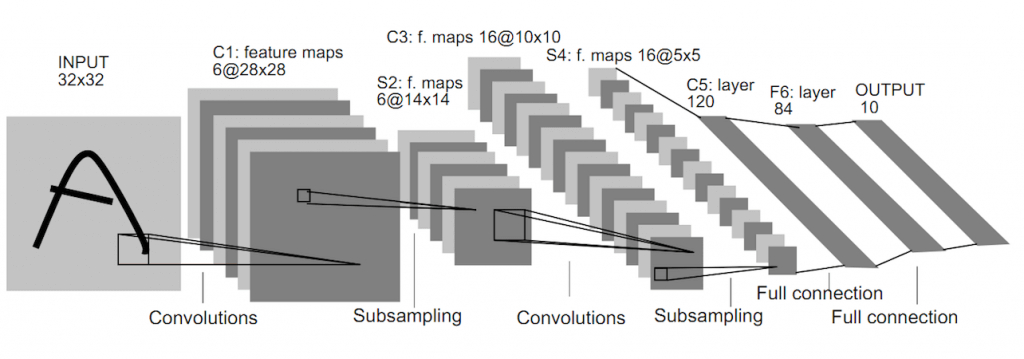

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1

>


    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

 **Implementação da arquitetura**

In [32]:
from tensorflow.keras import layers, models

LeNet = models.Sequential()#vaireceber uma sequência de camadas

LeNet.add(layers.Conv2D(6,(5, 5), activation = 'relu', input_shape = (32,32,1)))
#filtro de tamanho 6 matriz 5x5 função relu e entradade...

LeNet.add(layers.AveragePooling2D())
 #nao vai ser max pooling quer é o maior, o average vai ser
# a média p kernel de convolução pra fazer a redução pra um numero cada 5x5


LeNet.add(layers.Conv2D(16,(5, 5), activation = 'relu'))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Flatten())

LeNet.add(layers.Dense(120, activation = 'relu'))#120 neurônios

LeNet.add(layers.Dense(84, activation = 'relu'))
LeNet.add(layers.Dense(43, activation = 'softmax')) # vai retornar uma probabilidde para cada ujma das classest
LeNet.summary( )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

No quadro acima, como as imagens são 32x32 deveríamos passar 1024 pixels por imagem mas estaríamos passando partes da imagem que não tem relevância para a classificação ao invés disso passamos um flatten com 400 pixels para a camada densa processar

In [33]:
LeNet.compile(optimizer='Adam', loss ='sparse_categorical_crossentropy', metrics = ['accuracy'] )


In [34]:
history = LeNet.fit(X_train_gray_norm, y_train,
                    batch_size = 500,
                    epochs = 50,
                    validation_data = (X_validation_gray_norm, y_validation))

Epoch 1/50
70/70 [==============================] - 21s 273ms/step - loss: 3.1124 - accuracy: 0.1887 - val_loss: 2.5241 - val_accuracy: 0.3481
Epoch 2/50
70/70 [==============================] - 18s 262ms/step - loss: 1.5502 - accuracy: 0.5732 - val_loss: 1.3140 - val_accuracy: 0.6252
Epoch 3/50
70/70 [==============================] - 19s 267ms/step - loss: 0.8567 - accuracy: 0.7584 - val_loss: 0.9088 - val_accuracy: 0.7385
Epoch 4/50
70/70 [==============================] - 19s 268ms/step - loss: 0.6089 - accuracy: 0.8314 - val_loss: 0.7648 - val_accuracy: 0.7705
Epoch 5/50
70/70 [==============================] - 19s 266ms/step - loss: 0.4860 - accuracy: 0.8668 - val_loss: 0.7104 - val_accuracy: 0.7971
Epoch 6/50
70/70 [==============================] - 19s 266ms/step - loss: 0.3996 - accuracy: 0.8924 - val_loss: 0.6677 - val_accuracy: 0.7941
Epoch 7/50
70/70 [==============================] - 19s 267ms/step - loss: 0.3405 - accuracy: 0.9105 - val_loss: 0.6554 - val_accuracy: 0.8138

# Etapa 6- Avaliação do modelo

In [35]:
score = LeNet.evaluate(X_test_gray_norm,y_test)
print('Test Accuracy: {} '.format(score[1]))

395/395 [==============================] - 4s 9ms/step - loss: 1.3654 - accuracy: 0.8702
Test Accuracy: 0.8702296018600464 


score na base de dados x_test_gray_norm

score na posição 0 tem o loss na posição 1 tem o accuracy

In [36]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

para verificar os campos que temos em seguida devemos buscar cada 1

In [37]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss =  history.history['loss']
val_loss =  history.history['val_loss']

In [38]:
val_accuracy

[0.3480725586414337,
 0.6251700520515442,
 0.738548755645752,
 0.7705215215682983,
 0.7970521450042725,
 0.7941043376922607,
 0.8138322234153748,
 0.8489795923233032,
 0.835827648639679,
 0.8548752665519714,
 0.8657596111297607,
 0.8562358021736145,
 0.8673469424247742,
 0.8714285492897034,
 0.8798186182975769,
 0.8730158805847168,
 0.8582766652107239,
 0.8589569330215454,
 0.8648526072502136,
 0.864625871181488,
 0.8698412775993347,
 0.8643990755081177,
 0.8784580230712891,
 0.8714285492897034,
 0.8777777552604675,
 0.875283420085907,
 0.8784580230712891,
 0.8814058899879456,
 0.8721088171005249,
 0.8721088171005249,
 0.8743764162063599,
 0.8748299479484558,
 0.8782312870025635,
 0.8748299479484558,
 0.8750566840171814,
 0.8687074780464172,
 0.8718820810317993,
 0.8791383504867554,
 0.8739228844642639,
 0.8739228844642639,
 0.8827664256095886,
 0.8700680136680603,
 0.8861678242683411,
 0.8820861577987671,
 0.8800453543663025,
 0.8786848187446594,
 0.8845804929733276,
 0.87845802307128

<ipython-input-42-7eb4ee654b4a>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs,accuracy,'bo',color='r', label = 'Trainning accuracy')


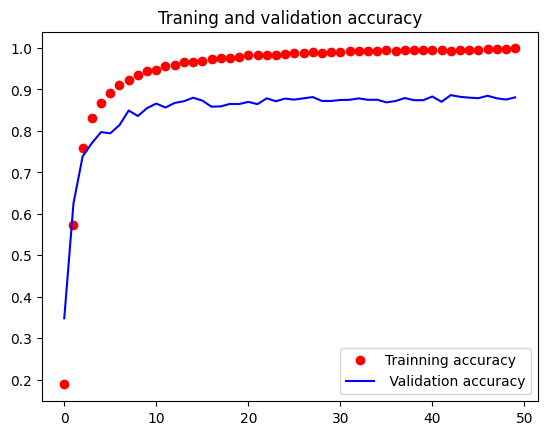

In [42]:
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'bo',color='r', label = 'Trainning accuracy')
plt.plot(epochs,val_accuracy,'b',label = ' Validation accuracy')
plt.title('Traning and validation accuracy')
plt.legend()

<ipython-input-44-fe3dae8778ca>:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs,loss,'ro',color='r', label = 'Trainning loss')


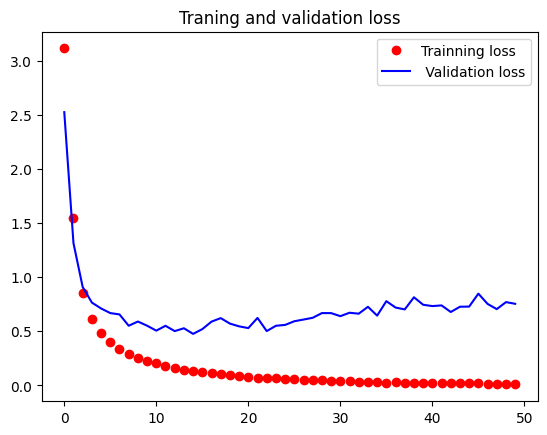

In [44]:
plt.plot(epochs,loss,'ro',color='r', label = 'Trainning loss')
plt.plot(epochs,val_loss,'b',label = ' Validation loss')
plt.title('Traning and validation loss')
plt.legend()

In [59]:
predict_x = LeNet.predict(X_test_gray_norm)
predicted_classes=np.argmax(predict_x,axis=1)
y_true = y_test

395/395 [==============================] - 3s 9ms/step


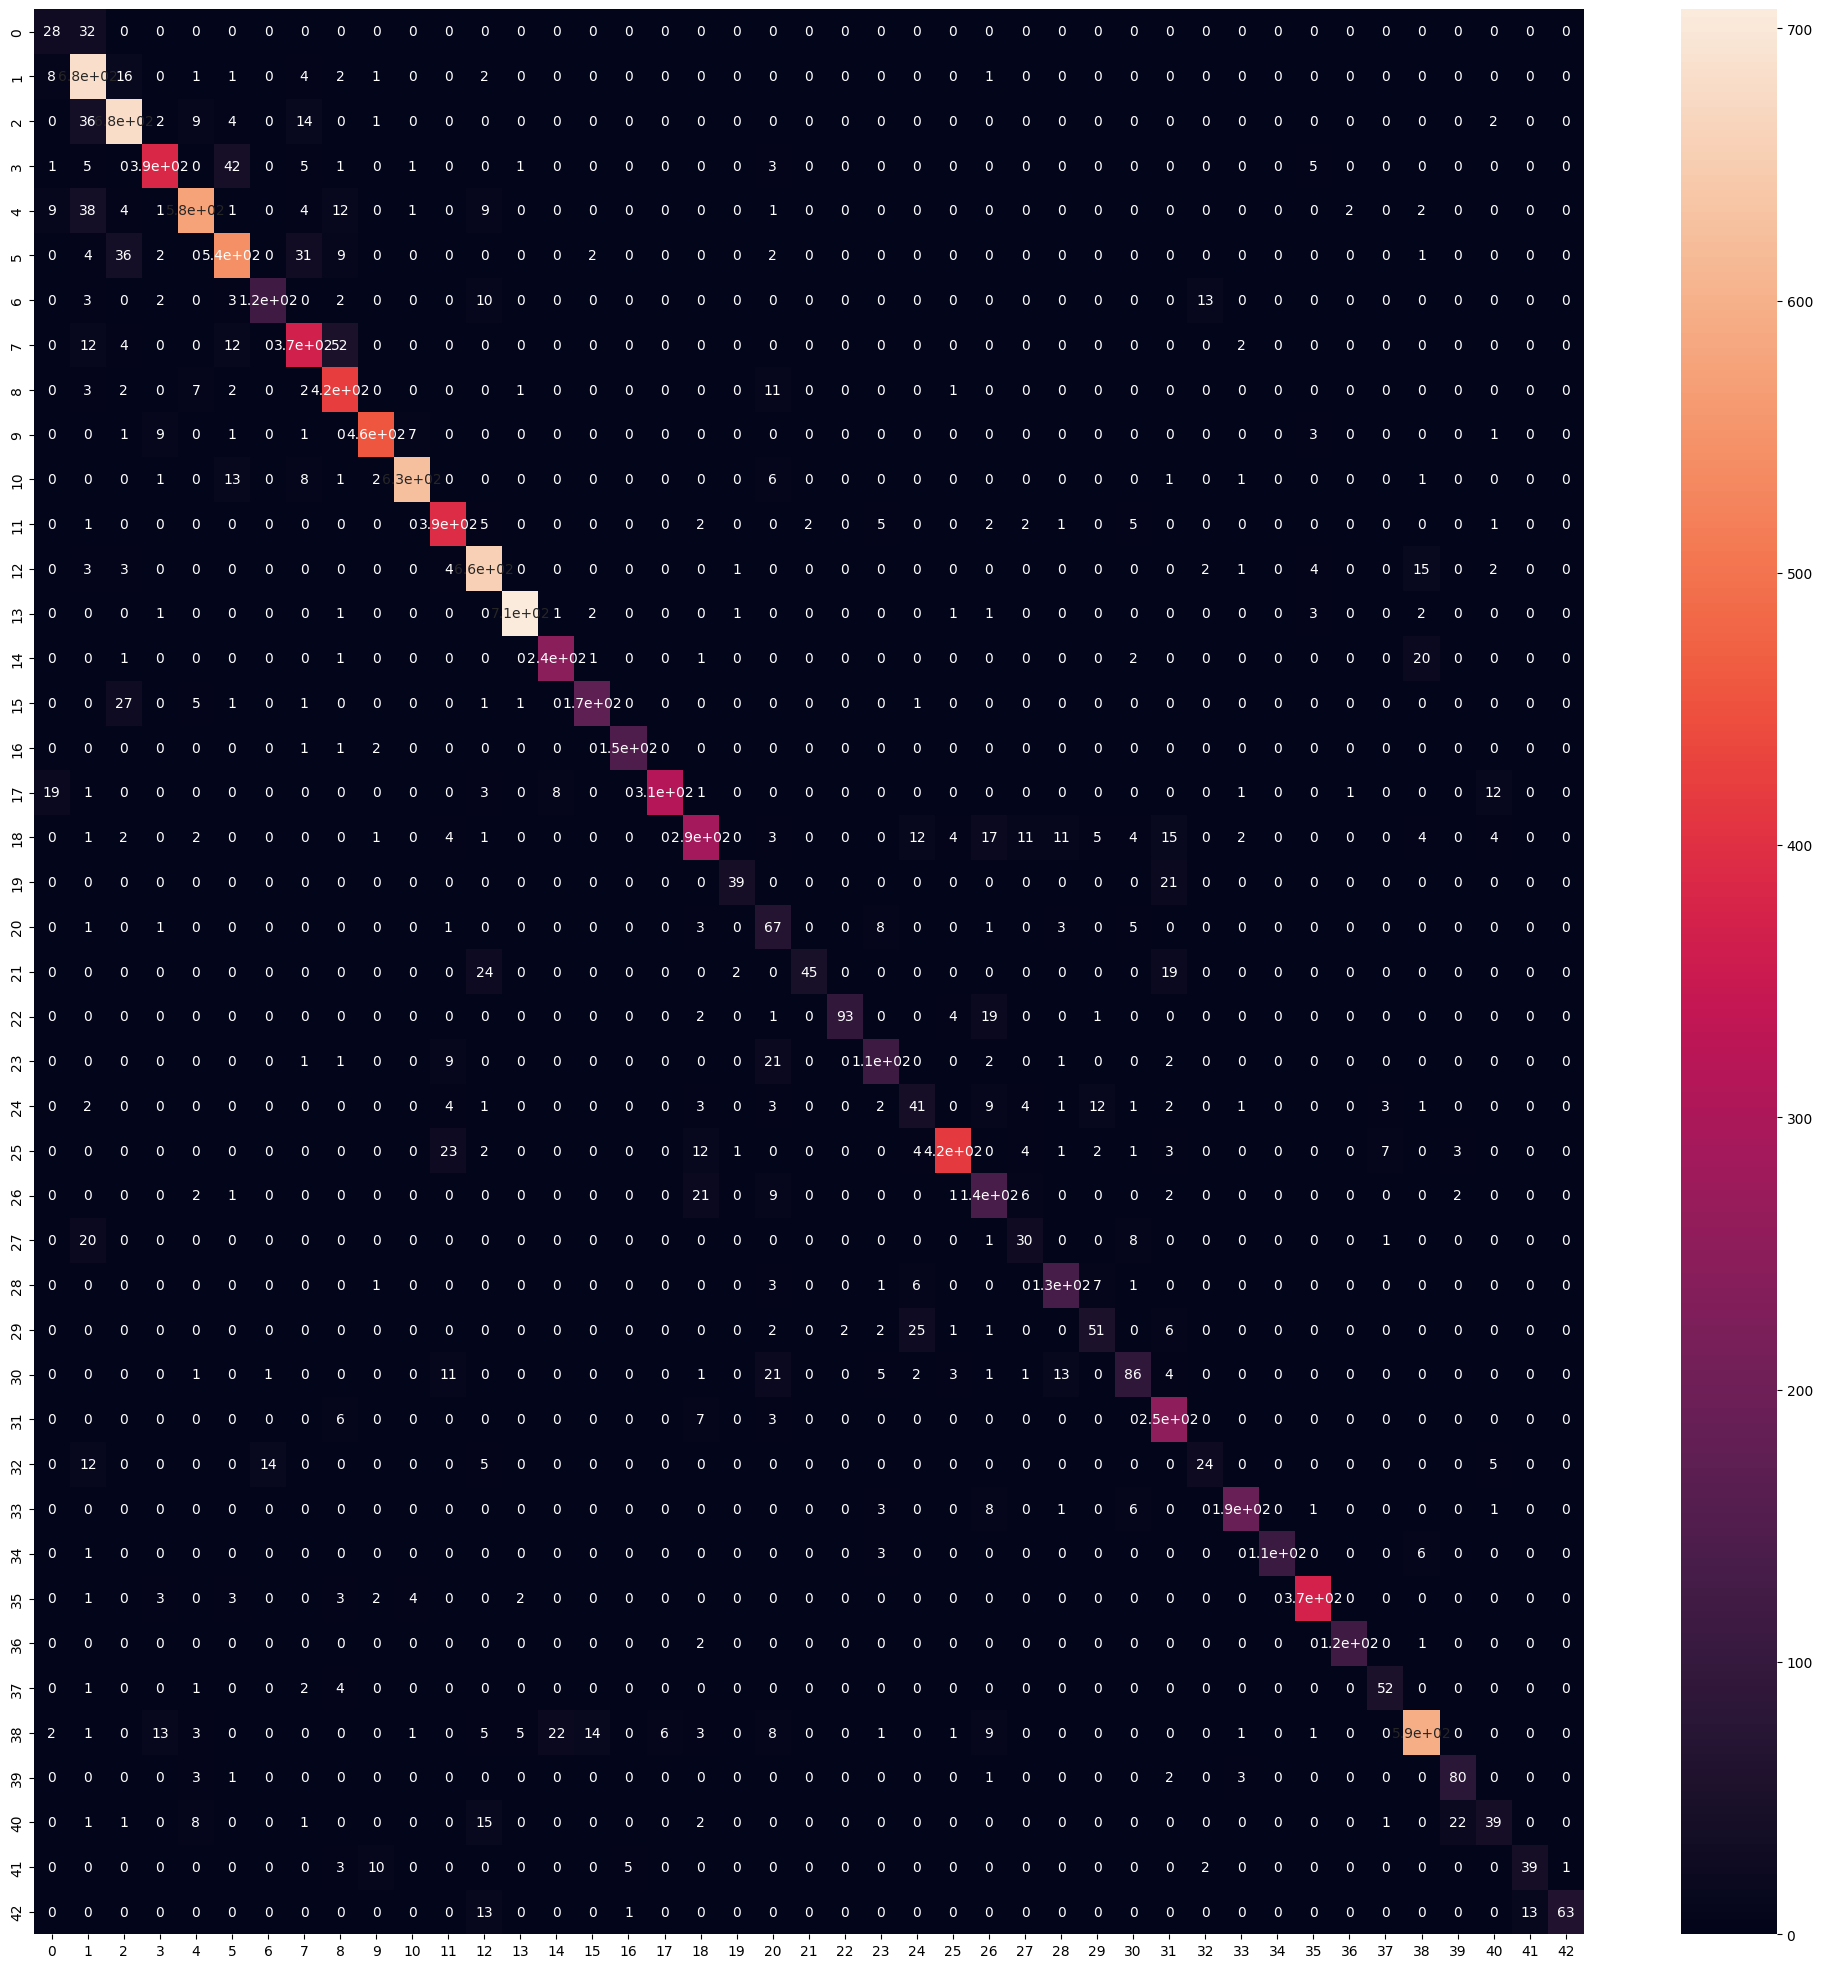

In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True);

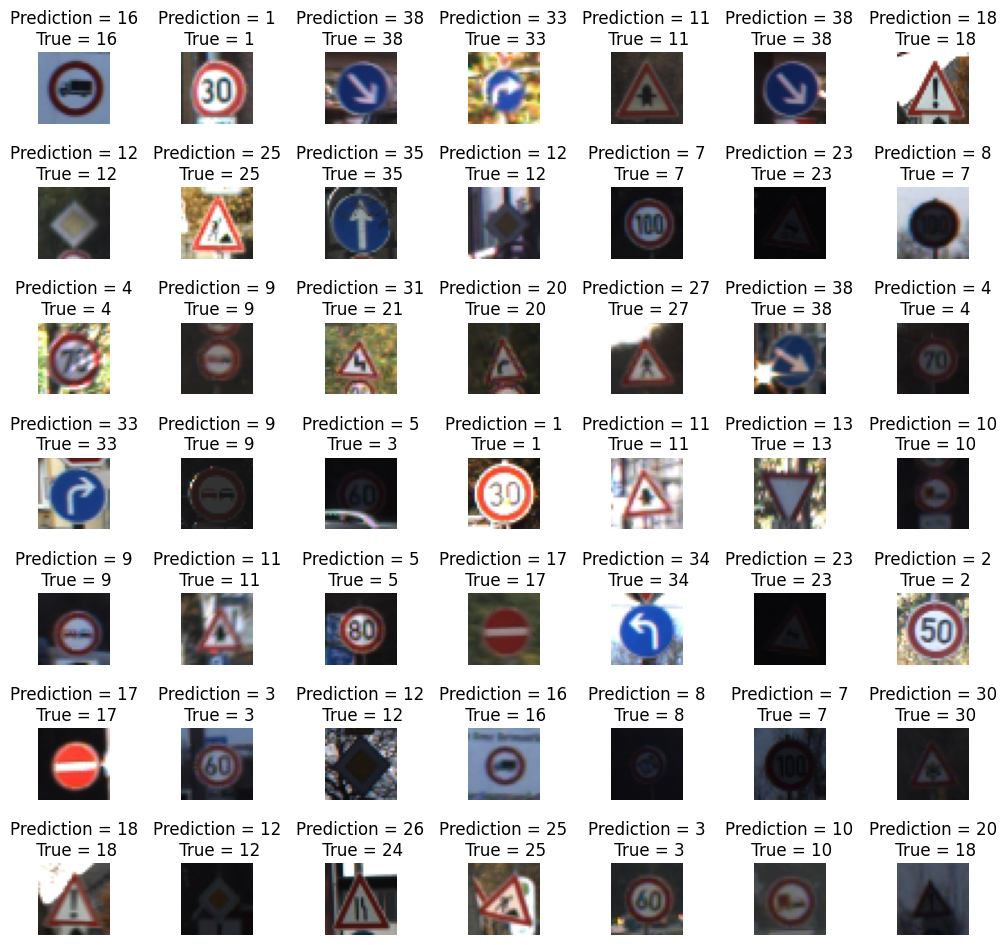

In [73]:
L=7
W=7
fig, axes = plt.subplots(L, W, figsize =(12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):
  axes[i].imshow(X_test[i])
  axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
  axes[i].axis('off')
plt.subplots_adjust(wspace = 1)


 nas figuras podemos observar que a maioria das predições estão corretas
2-7,3-3,4-3,6-3,7-2,7-7 estão erradas